In [31]:
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import statsmodels.api as sn

In [32]:
df=pd.read_csv('insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [33]:
label='charges'



y = df['charges']
X = df[['age','bmi','children']].assign(const=1) 


model=sn.OLS(y,X)
results=model.fit()
results.summary() #разобрать все метрики здесь


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           8.80e-37
Time:                        00:39:52   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
df['predictions']=results.fittedvalues
df #предикты хуйня, посмотреть потом из таблицы выше почему так нахуй

,age,sex,bmi,children,smoker,region,charges,predictions
0,19,female,27.900,0,yes,southwest,16884.92400,6908.777533
1,18,male,33.770,1,no,southeast,1725.55230,9160.977061
2,28,male,33.000,3,no,southeast,4449.46200,12390.946918
3,33,male,22.705,0,no,northwest,21984.47061,8543.527095
4,32,male,28.880,0,no,northwest,3866.85520,10354.147396
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,16996.696122
1334,18,female,31.920,0,no,northeast,2205.98080,8003.758184
1335,18,female,36.850,0,no,southeast,1629.83350,9640.929171
1336,21,female,25.800,0,no,southwest,2007.94500,6691.391417


In [35]:
results.predict([19,27.9,0,1])

array([6908.77753344])

In [36]:
df=pd.get_dummies(df,columns=['sex'],prefix='sex',drop_first=True) #drop_first - типо убираем первую дамми переменную за ненадобностью
df=pd.get_dummies(df,columns=['smoker'],prefix='smoker',drop_first=True)
df=pd.get_dummies(df,columns=['region'],prefix='region',drop_first=True)


df.head()

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,6908.777533,False,True,False,False,True
1,18,33.770,1,1725.55230,9160.977061,True,False,False,True,False
2,28,33.000,3,4449.46200,12390.946918,True,False,False,True,False
3,33,22.705,0,21984.47061,8543.527095,True,False,True,False,False
4,32,28.880,0,3866.85520,10354.147396,True,False,True,False,False


In [37]:
for i in df.columns:
    if i in ('sex_male','smoker_yes','region_northwest','region_southeast','region_southwest'):
        df[i]=df[i].apply(lambda x: 1 if x==True else 0)
        



In [38]:
df.head(2)

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,6908.777533,0,1,0,0,1
1,18,33.77,1,1725.5523,9160.977061,1,0,0,1,0


In [39]:
X = df.drop(columns=['charges','predictions']).assign(const=1)
results=sn.OLS(y,X).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:39:52   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
const            -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from sklearn import preprocessing

df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),columns=df.columns)

In [41]:
df_zscore.head(2)

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.516418,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,-0.979564,0.989591,-0.507463,-0.566418,1.635795,-0.566418


In [42]:
y=df_zscore.charges
X=df_zscore.drop(columns=['predictions','charges']).assign(const=1)

In [43]:
results=sn.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:39:52   Log-Likelihood:                -968.66
No. Observations:                1338   AIC:                             1955.
Df Residuals:                    1329   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.2980      0.014     21.587      0.000       0.271       0.325
bmi                  0.1708      0.014     11.860      0.000       0.143       0.199
children             0.0473      0.014      3.451      0.001       0.020       0.074
sex_male            -0.0054      0.014     -0.394      0.693      -0.032       0.022
smoker_yes           0.7950      0.014     57.723      0.000       0.768       0.822
region_northwest    -0.0125      0.017     -0.741      0.459      -0.046       0.021
region_southeast    -0.0380      0.018     -2.162      0.031      -0.073      -0.004
region_southwest    -0.0340      0.017     -2.009      0.045      -0.067      -0.001
const             -1.09e-17      0.014  -7.96e-16      1.000      -0.027       0.027
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         2.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='charges', ylabel='Count'>

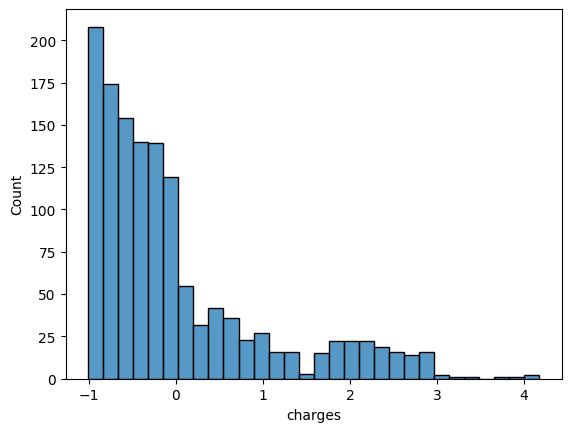

In [44]:
sns.histplot(y)

<Axes: xlabel='charges', ylabel='Count'>

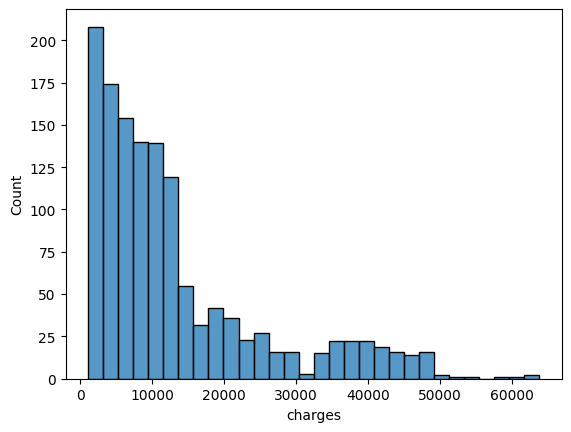

In [45]:
sns.histplot(df.charges)#они одинаковые типо

In [46]:

df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df),columns=df.columns)

In [47]:
df_minmax.head(3)

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.199302,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.306046,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.459133,1.0,0.0,0.0,1.0,0.0


In [48]:
df_minmax.describe()

,age,bmi,children,charges,predictions,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,0.193916,0.500816,0.505232,0.204783,0.242900,0.272048,0.242900
std,0.305434,0.164062,0.241099,0.193301,0.198908,0.500160,0.403694,0.428995,0.445181,0.428995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.057757,0.350003,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,0.200000,0.131849,0.504599,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504002,0.400000,0.247700,0.646061,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='charges', ylabel='Count'>

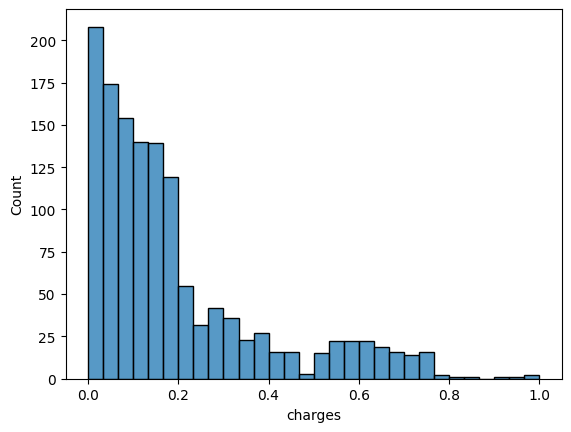

In [49]:
sns.histplot(df_minmax.charges)

In [50]:
y=df_minmax.charges
X=df_minmax.drop(columns=['predictions','charges']).assign(const=1)
results=sn.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:39:53   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.1886      0.009     21.587      0.000       0.171       0.206
bmi                  0.2012      0.017     11.860      0.000       0.168       0.235
children             0.0379      0.011      3.451      0.001       0.016       0.060
sex_male            -0.0021      0.005     -0.394      0.693      -0.013       0.008
smoker_yes           0.3807      0.007     57.723      0.000       0.368       0.394
region_northwest    -0.0056      0.008     -0.741      0.459      -0.021       0.009
region_southeast    -0.0165      0.008     -2.162      0.031      -0.032      -0.002
region_southwest    -0.0153      0.008     -2.009      0.045      -0.030      -0.000
const               -0.0483      0.009     -5.151      0.000      -0.067      -0.030
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='charges', ylabel='Count'>

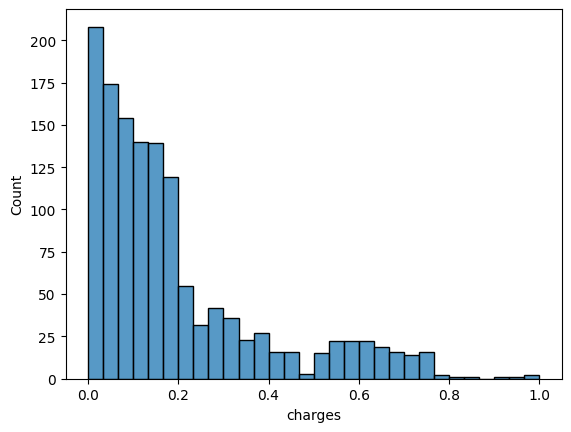

In [51]:
sns.histplot(df_minmax.charges)


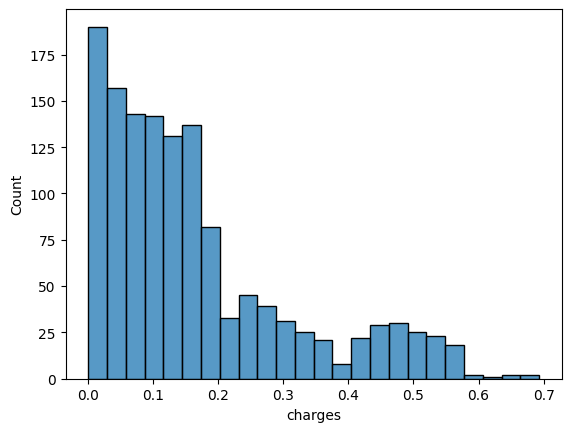

In [52]:
y=np.log1p(y)
sns.histplot(y); #границы другие


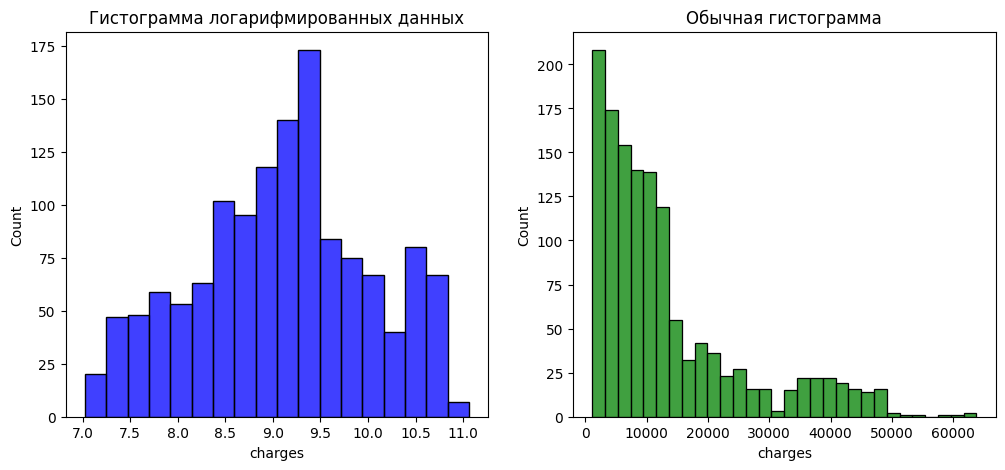

In [57]:
""" sns.histplot(np.log(df.charges))
sns.histplot(df.charges)
plt.show() #как показать сразу 2 рядом
 """


charges_log = np.log(df['charges'])

# Создаем сетку 1x2 (1 строка, 2 столбца)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# График 1: Гистограмма логарифмированных данных
sns.histplot(charges_log, ax=axes[0], color='blue')
axes[0].set_title('Гистограмма логарифмированных данных')

# График 2: Обычная гистограмма
sns.histplot(df['charges'], ax=axes[1], color='green')
axes[1].set_title('Обычная гистограмма')

# Регулируем расположение графиков
#plt.tight_layout()

# Показываем графики
plt.show()

In [54]:
y=np.log(df.charges)
X=df.drop(columns=['predictions','charges']).assign(const=1)
sn.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:39:53   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0346      0.001     39.655      0.000       0.033       0.036
bmi                  0.0134      0.002      6.381      0.000       0.009       0.017
children             0.1019      0.010     10.085      0.000       0.082       0.122
sex_male            -0.0754      0.024     -3.091      0.002      -0.123      -0.028
smoker_yes           1.5543      0.030     51.333      0.000       1.495       1.614
region_northwest    -0.0638      0.035     -1.827      0.068      -0.132       0.005
region_southeast    -0.1572      0.035     -4.481      0.000      -0.226      -0.088
region_southwest    -0.1290      0.035     -3.681      0.000      -0.198      -0.060
const                7.0306      0.072     97.112      0.000       6.889       7.173
==============================================================================
Omnibus:                      463.882   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1673.760
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                       7.330   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#мультиколинеарность здесь
#про VIF ПОСМОТРЕТь и tolerance

